In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [3]:
df = pd.read_csv("Travel.csv")
df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


Data Cleaning
Handling Missing values
1.Handling missing values
2.Handling Duplicates
3.Check datatypes
3.Understand the dataset

In [4]:
##check all the categories
df["Gender"].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [5]:
df["MaritalStatus"].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [6]:
df["TypeofContact"].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [7]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [8]:
df["Gender"] = df["Gender"].replace("Fe Male","Female")
df["MaritalStatus"] = df["MaritalStatus"].replace("Single","Unmarried")

In [9]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [10]:
##checking missing values
features_with_nan = [features for features in df.columns if df[features].isnull().sum() >= 1]
for feature in features_with_nan:
    print(feature,np.round(df[feature].isnull().mean()*100,5),"% missing values")

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [11]:
##statistics on the numerical columns
df[features_with_nan].select_dtypes(exclude="object").describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [12]:
##Age
df.Age.fillna(df.Age.median(),inplace=True)

#TypeOfContact
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)

#DurationOfPitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)

#NumberOfFollowups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)

#PreferredPropertyStar
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)

#NumberOfTrips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)

#NumberOfChildrenVisiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)

#MonthlyIncome
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)

In [13]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [14]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [15]:
##remove the column Customer ID
df.drop('CustomerID',inplace=True,axis=1)

In [16]:
##create new column for the feature
df["TotalVisiting"] = df["NumberOfPersonVisiting"] + df["NumberOfChildrenVisiting"]
df.drop(columns=["NumberOfPersonVisiting","NumberOfChildrenVisiting"],inplace=True,axis=1)

In [17]:
##get all the numeric features
numeric_feature = [features for features in df.columns if df[features].dtype != 'O']
print("total numeric features are :",len(numeric_feature))

total numeric features are : 12


In [18]:
categorical_feature = [features for features in df.columns if df[features].dtype == 'O']
print("total numeric features are :",len(categorical_feature))

total numeric features are : 6


In [19]:
discrete_feature = [feature for feature in numeric_feature if len(df[feature].unique()) <= 25]
print("Total discrete features:",len(discrete_feature))

Total discrete features: 9


In [20]:
continuous_feature = [feature for feature in numeric_feature if feature not in discrete_feature]
print("Total Number of continuous features:",len(continuous_feature))

Total Number of continuous features: 3


Train Test split and model training

In [21]:
from sklearn.model_selection import train_test_split
X = df.drop(['ProdTaken'],axis=1)
y = df['ProdTaken']

In [22]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [23]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((3910, 17), (978, 17))

In [25]:
##create column transformer with 3 different types of transformers
cat_features = X.select_dtypes(include="object").columns
numeric_features = X.select_dtypes(exclude="object").columns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

standard = StandardScaler()
onehot = OneHotEncoder()

processor = ColumnTransformer(
    [
        ("OneHotEncoder",onehot,cat_features),
        ("StandardScaler",standard,numeric_features)
    ]
)

In [26]:
processor

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('OneHotEncoder', ...), ('StandardScaler', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``f

In [27]:
X_train = processor.fit_transform(X_train)

In [28]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,0.679690,0.782966,-0.382245,-0.774151
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,-0.721400,0.690023,0.282777,-0.725271,1.511598,-0.632399,0.679690,0.782966,-0.459799,0.643615
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,-0.721400,-1.020350,0.282777,1.771041,0.418708,-0.632399,0.679690,0.782966,-0.245196,-0.065268
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,1.408395,-1.277194,0.213475,-0.065268
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,-0.721400,2.400396,-1.720227,-0.725271,1.511598,-0.632399,-0.049015,-1.277194,-0.024889,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,-0.721400,-0.653841,1.284279,-0.725271,-0.674182,-0.632399,-1.506426,0.782966,-0.536973,0.643615
3906,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.455047,-0.898180,-0.718725,1.771041,-1.220627,-0.632399,1.408395,0.782966,1.529609,-0.065268
3907,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.455047,1.545210,0.282777,-0.725271,2.058043,-0.632399,-0.777720,0.782966,-0.360576,0.643615
3908,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.455047,1.789549,1.284279,-0.725271,-0.127737,-0.632399,-1.506426,0.782966,-0.252799,0.643615


In [29]:
X_test = processor.transform(X_test)

Model Training

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,precision_score,recall_score,roc_auc_score,f1_score

In [31]:
models = {
    "Decision Tree" : DecisionTreeClassifier(),
    "Random Forest" : RandomForestClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)#train model

    ##Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ##Training set performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_rocaoc_score = roc_auc_score(y_train,y_train_pred)

    ##Testing set performance
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_rocaoc_score = roc_auc_score(y_test,y_test_pred)

    print(list(models.keys())[i])

    print("Model Performance for training set")
    print("-Accuracy : {:.4f}".format(model_train_accuracy))
    print("-F1-score : {:.4f}".format(model_train_f1))
    print("-Precision : {:.4f}".format(model_train_precision))
    print("-Recall : {:.4f}".format(model_train_recall))
    print("-Roc-Auc-score : {:.4f}".format(model_train_rocaoc_score))

    print("-----------------------------------------------------------")

    print("Model Performance for testing set")
    print("-Accuracy : {:.4f}".format(model_test_accuracy))
    print("-F1-score : {:.4f}".format(model_test_f1))
    print("-Precision : {:.4f}".format(model_test_precision))
    print("-Recall : {:.4f}".format(model_test_recall))
    print("-Roc-Auc-score : {:.4f}".format(model_test_rocaoc_score))

    print('='*35)
    print("\n")

Decision Tree
Model Performance for training set
-Accuracy : 1.0000
-F1-score : 1.0000
-Precision : 1.0000
-Recall : 1.0000
-Roc-Auc-score : 1.0000
-----------------------------------------------------------
Model Performance for testing set
-Accuracy : 0.9100
-F1-score : 0.9089
-Precision : 0.7877
-Recall : 0.7382
-Roc-Auc-score : 0.8450


Random Forest
Model Performance for training set
-Accuracy : 1.0000
-F1-score : 1.0000
-Precision : 1.0000
-Recall : 1.0000
-Roc-Auc-score : 1.0000
-----------------------------------------------------------
Model Performance for testing set
-Accuracy : 0.9233
-F1-score : 0.9167
-Precision : 0.9677
-Recall : 0.6283
-Roc-Auc-score : 0.8116




In [32]:
##Hyperparameter Training

In [46]:
rf_params = {
    "max_depth": [5, 8, 10, 15, None],
    "max_features": ["sqrt", "log2", 5, 7, 8],
    "min_samples_split": [2, 8, 15, 20],
    "n_estimators": [100, 200, 500, 1000]
}


In [47]:
rf_params

{'max_depth': [5, 8, 10, 15, None],
 'max_features': ['sqrt', 'log2', 5, 7, 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [48]:
##Models list for hyperparameter tuning
randomcv_models = [
    ("RF",RandomForestClassifier(random_state=42),rf_params)
]

In [49]:
randomcv_models

[('RF',
  RandomForestClassifier(random_state=42),
  {'max_depth': [5, 8, 10, 15, None],
   'max_features': ['sqrt', 'log2', 5, 7, 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [51]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name,model,params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=-1,random_state=42)
    random.fit(X_train,y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"-------------------Best params for {model_name}-------------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
-------------------Best params for RF-------------------------
{'n_estimators': 200, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}


In [55]:
models = {
    "Random Forest" : RandomForestClassifier(n_estimators= 200, min_samples_split = 2, max_features = 8, max_depth = None)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)#train model

    ##Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ##Training set performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_rocaoc_score = roc_auc_score(y_train,y_train_pred)

    ##Testing set performance
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_rocaoc_score = roc_auc_score(y_test,y_test_pred)

    print(list(models.keys())[i])

    print("Model Performance for training set")
    print("-Accuracy : {:.4f}".format(model_train_accuracy))
    print("-F1-score : {:.4f}".format(model_train_f1))
    print("-Precision : {:.4f}".format(model_train_precision))
    print("-Recall : {:.4f}".format(model_train_recall))
    print("-Roc-Auc-score : {:.4f}".format(model_train_rocaoc_score))

    print("-----------------------------------------------------------")

    print("Model Performance for testing set")
    print("-Accuracy : {:.4f}".format(model_test_accuracy))
    print("-F1-score : {:.4f}".format(model_test_f1))
    print("-Precision : {:.4f}".format(model_test_precision))
    print("-Recall : {:.4f}".format(model_test_recall))
    print("-Roc-Auc-score : {:.4f}".format(model_test_rocaoc_score))

    print('='*35)
    print("\n")

Random Forest
Model Performance for training set
-Accuracy : 1.0000
-F1-score : 1.0000
-Precision : 1.0000
-Recall : 1.0000
-Roc-Auc-score : 1.0000
-----------------------------------------------------------
Model Performance for testing set
-Accuracy : 0.9387
-F1-score : 0.9351
-Precision : 0.9580
-Recall : 0.7173
-Roc-Auc-score : 0.8548




Plot Roc-Auc curve

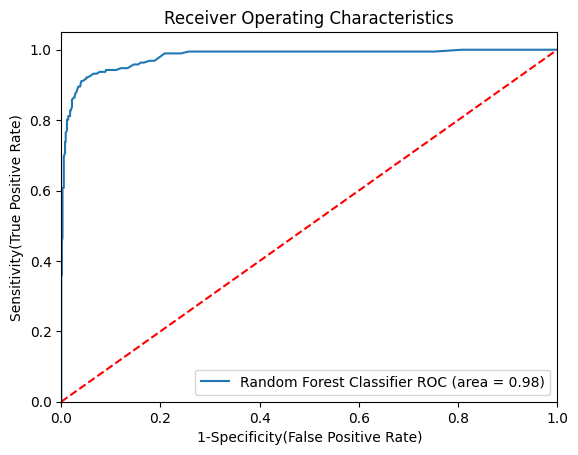

In [61]:
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

auc_models = [
{
    'label' : 'Random Forest Classifier',
    'model':RandomForestClassifier(n_estimators= 200, min_samples_split = 2, max_features = 8, max_depth = None),
    'auc' : 0.8548
},
]

for algo in auc_models:
    model = algo['model']
    model.fit(X_train,y_train)

    y_prob = model.predict_proba(X_test)[:,1]
    fpr,tpr,thresholds = roc_curve(y_test,y_prob)
    auc_score = roc_auc_score(y_test,y_prob)
    plt.plot(fpr,tpr,label='%s ROC (area = %0.2f)' % (algo['label'], auc_score))

    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('1-Specificity(False Positive Rate)')
    plt.ylabel('Sensitivity(True Positive Rate)')
    plt.title('Receiver Operating Characteristics')
    plt.legend(loc="lower right")
    plt.savefig("auc.png")
    plt.show()